In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
# %matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the dataset
train = pd.read_csv("/content/drive/MyDrive/Intershala final project/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Intershala final project/test.csv")

In [4]:
#  Columns  for train data
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
#  Columns  for test data
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [6]:
#Rows and column count for train data
train.shape

(31647, 18)

In [7]:
#Rows and column count for test data
test.shape

(13564, 17)

In [8]:
#Datatype of train data
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [9]:
#train data first look
train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

## **Univariate Analysis**

In [10]:
#train data count of target variable 'subscribed'
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [11]:
#train data percentage  of target variable 'subscribed'
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<Axes: >

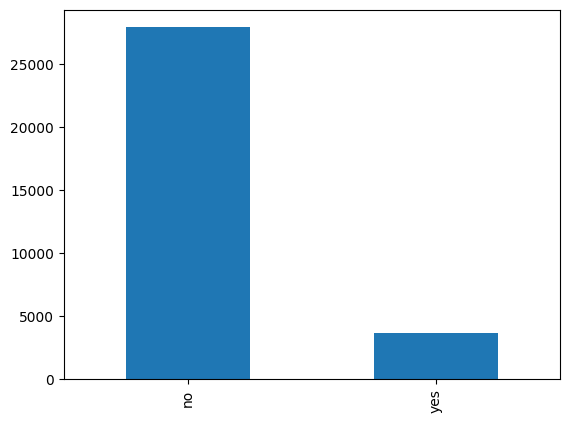

In [12]:
#Barplot of target variable 'subscribed'
train['subscribed'].value_counts().plot.bar()

<Axes: xlabel='age', ylabel='Density'>

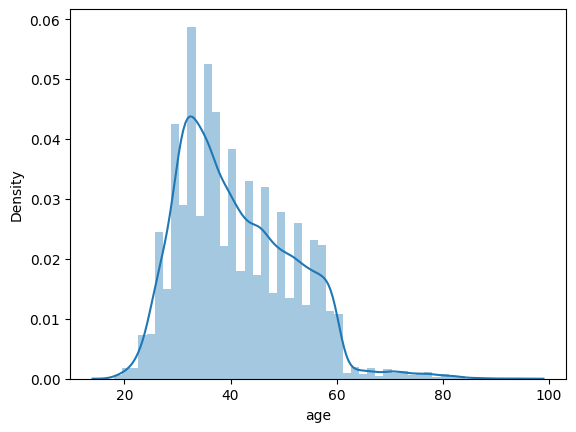

In [13]:
#distplot for input variable 'age'
sn.distplot(train["age"])

<Axes: >

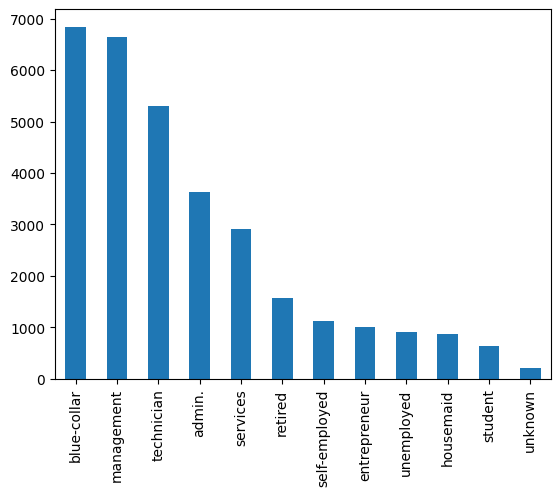

In [14]:
#Barplot for input variable 'job'
train['job'].value_counts().plot.bar()

<Axes: >

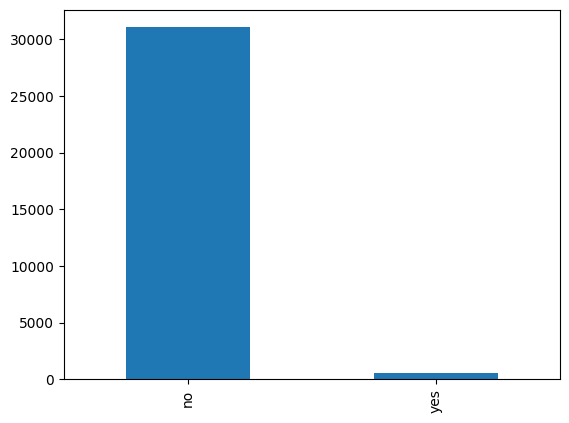

In [15]:
#Barplot for input variable 'default'
train['default'].value_counts().plot.bar()

## **Bivariate Analysis**

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

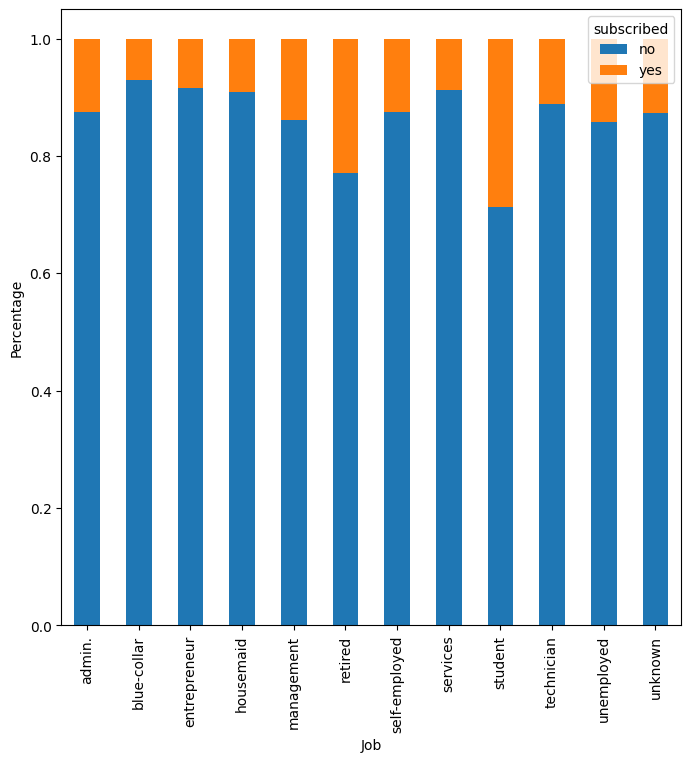

In [16]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

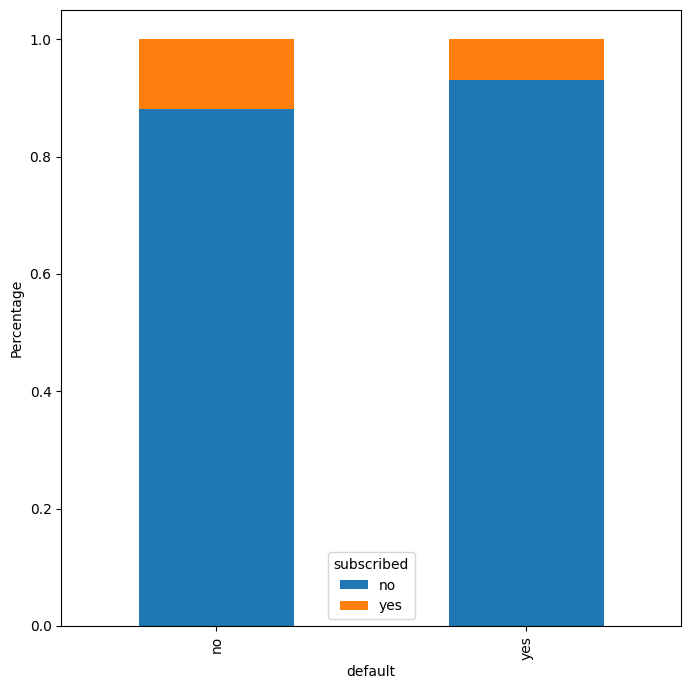

In [17]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [18]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<Axes: >

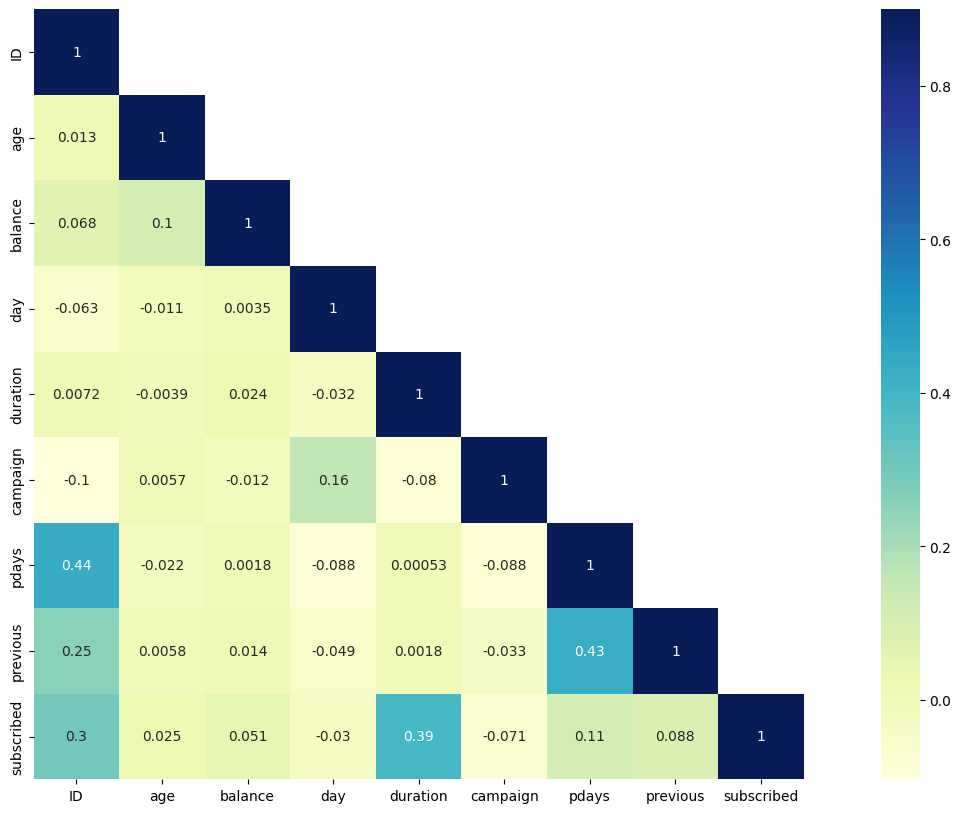

In [19]:
#checking correlation
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [21]:
#checking null values
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## **Model Building**

In [22]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [23]:
train = pd.get_dummies(train)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

## **Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

LogisticRegression()

In [27]:
prediction = lreg.predict(X_val)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, prediction)

0.8908372827804107

## **Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [30]:
predict = clf.predict(X_val)

In [31]:
accuracy_score(y_val, predict)

0.9063191153238547

## **KNN**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
knn_pred = knn.predict(X_val)

In [37]:
accuracy_score(y_val, knn_pred)

0.8906793048973144

## **Naive Bayes**

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [39]:
nb_pred = nb.predict(X_val)

In [40]:
accuracy_score(y_val, nb_pred)

0.8513428120063191

In [41]:
test = pd.get_dummies(test)

In [42]:
test_prediction = clf.predict(test)

In [43]:
submission = pd.DataFrame()

In [44]:
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [45]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [46]:
submission.to_csv('submission.csv', header=True, index=False)